In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv("Walmart DataSet.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [32]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [33]:
df.set_index('Date', inplace=True)
a= int(input("Enter the store id:"))
store = df[df.Store == a]
sales = pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())
sales.dtypes

Enter the store id:1


Weekly_Sales    float64
dtype: object

In [34]:
sales.head(20)

,Weekly_Sales
Date,
01-04-2011,1495064.75
01-06-2012,1624477.58
01-07-2011,1488538.09
01-10-2010,1453329.50
02-03-2012,1688420.76
02-04-2010,1594968.28
02-07-2010,1492418.14
02-09-2011,1550229.22
02-12-2011,1584083.95


In [35]:
sales.reset_index(inplace = True)
sales['Date'] = pd.to_datetime(sales['Date'],format='%d-%m-%Y')
sales.set_index('Date',inplace = True)

In [36]:
print(sales.head())

            Weekly_Sales
Date                    
2011-04-01    1495064.75
2012-06-01    1624477.58
2011-07-01    1488538.09
2010-10-01    1453329.50
2012-03-02    1688420.76


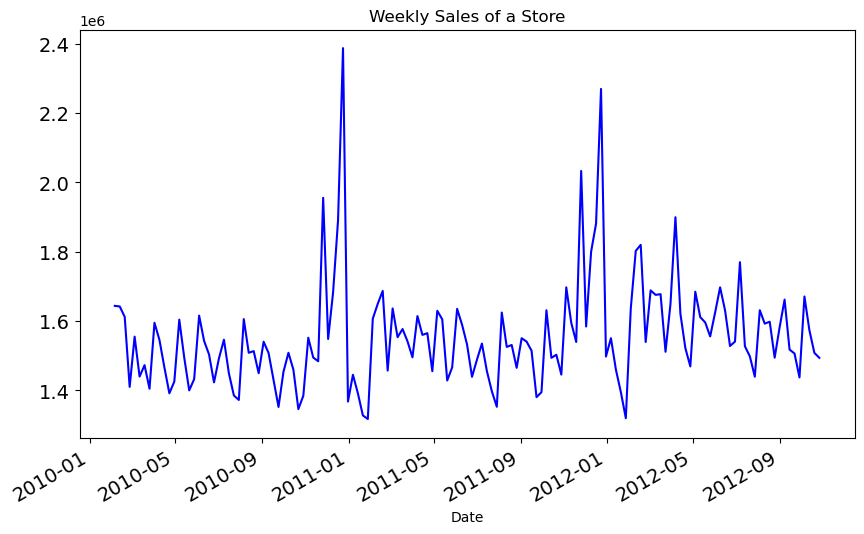

In [37]:
sales.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of a Store', fontsize=14, color = 'blue')
plt.show()

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

<Figure size 640x480 with 0 Axes>

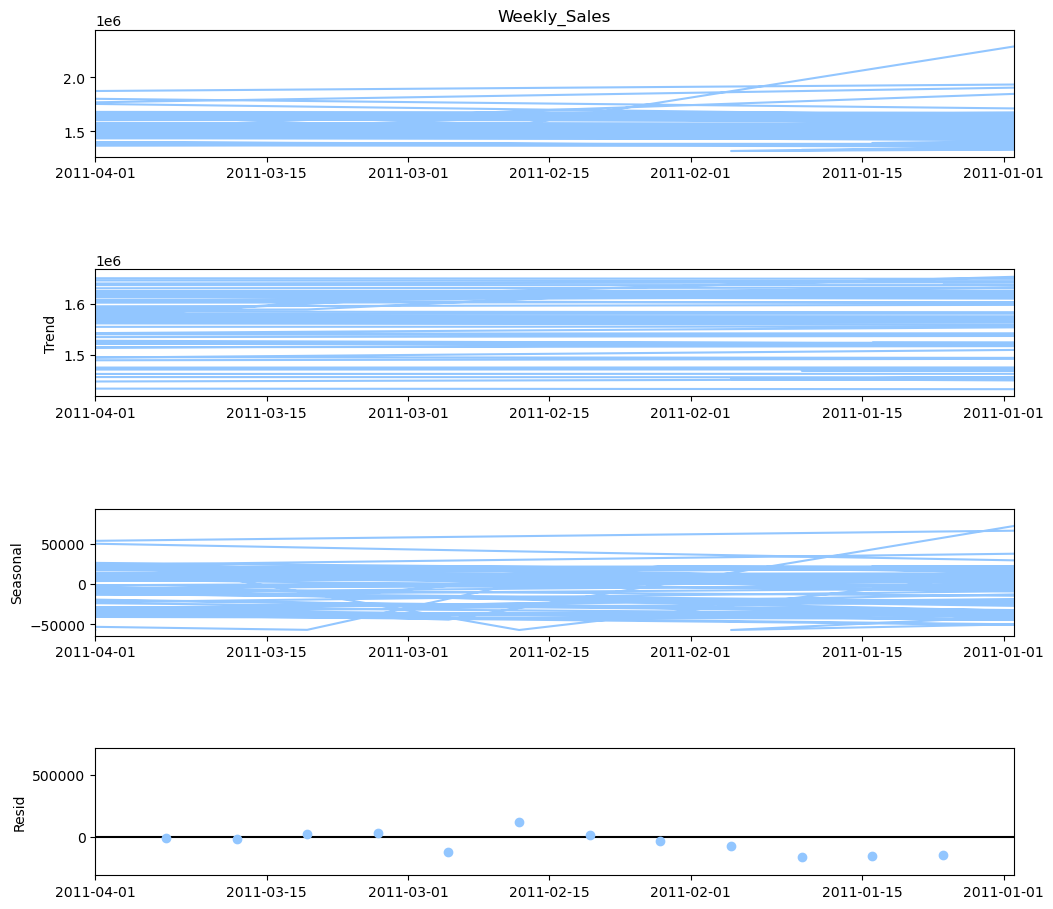

In [39]:

decomposition = seasonal_decompose(sales.Weekly_Sales, period=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

In [40]:
store5 = df[df.Store == 5]

sales5 = pd.DataFrame(store5.Weekly_Sales.groupby(store5.index).sum())
sales5.dtypes

sales5.reset_index(inplace = True)

sales5['Date'] = pd.to_datetime(sales5['Date'],format='%d-%m-%Y')
sales5.set_index('Date',inplace = True)

In [41]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106
12-02-2010,1,1641957.44,1,38.51,2.548,211.242170,8.106
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106
26-02-2010,1,1409727.59,0,46.63,2.561,211.319643,8.106
05-03-2010,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [42]:
y1=sales.Weekly_Sales
y2=sales5.Weekly_Sales

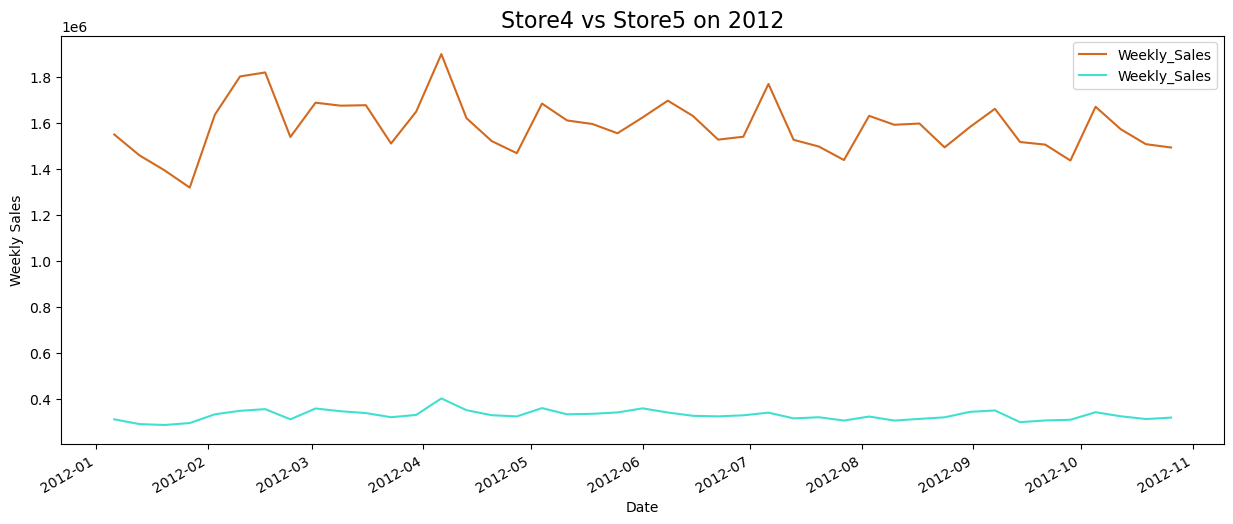

In [43]:
y1['2012'].plot(figsize=(15, 6),legend=True, color = 'chocolate')
y2['2012'].plot(figsize=(15, 6), legend=True, color = 'turquoise')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store5 on 2012', fontsize = '16')
plt.show()

In [44]:
p = d = q = range(0, 5)
import itertools
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [45]:
sales5.sort_index(inplace=True)

# Address non-stationarity by differencing
# sales5['Diff'] = sales5['Sales'].diff(1)

mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

C:\Users\bindu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bindu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bindu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bindu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bindu\anaconda3\lib\site-

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2289      0.281     -4.369      0.000      -1.780      -0.678
ar.L2         -1.0898      0.359     -3.035      0.002      -1.794      -0.386
ar.L3         -0.7835      0.285     -2.753      0.006      -1.341      -0.226
ar.L4         -0.6165      0.146     -4.212      0.000      -0.903      -0.330
ma.L1         -1.9898      0.331     -6.015      0.000      -2.638      -1.341
ma.L2          1.0148      0.635      1.597      0.110      -0.231       2.260
ma.L3         -0.0207      0.361     -0.057      0.954      -0.728       0.687
ar.S.L52      -0.3028      0.115     -2.638      0.008      -0.528      -0.078
sigma2      1.233e+11    4.8e-12   2.57e+22      0.000    1.23e+11    1.23e+11


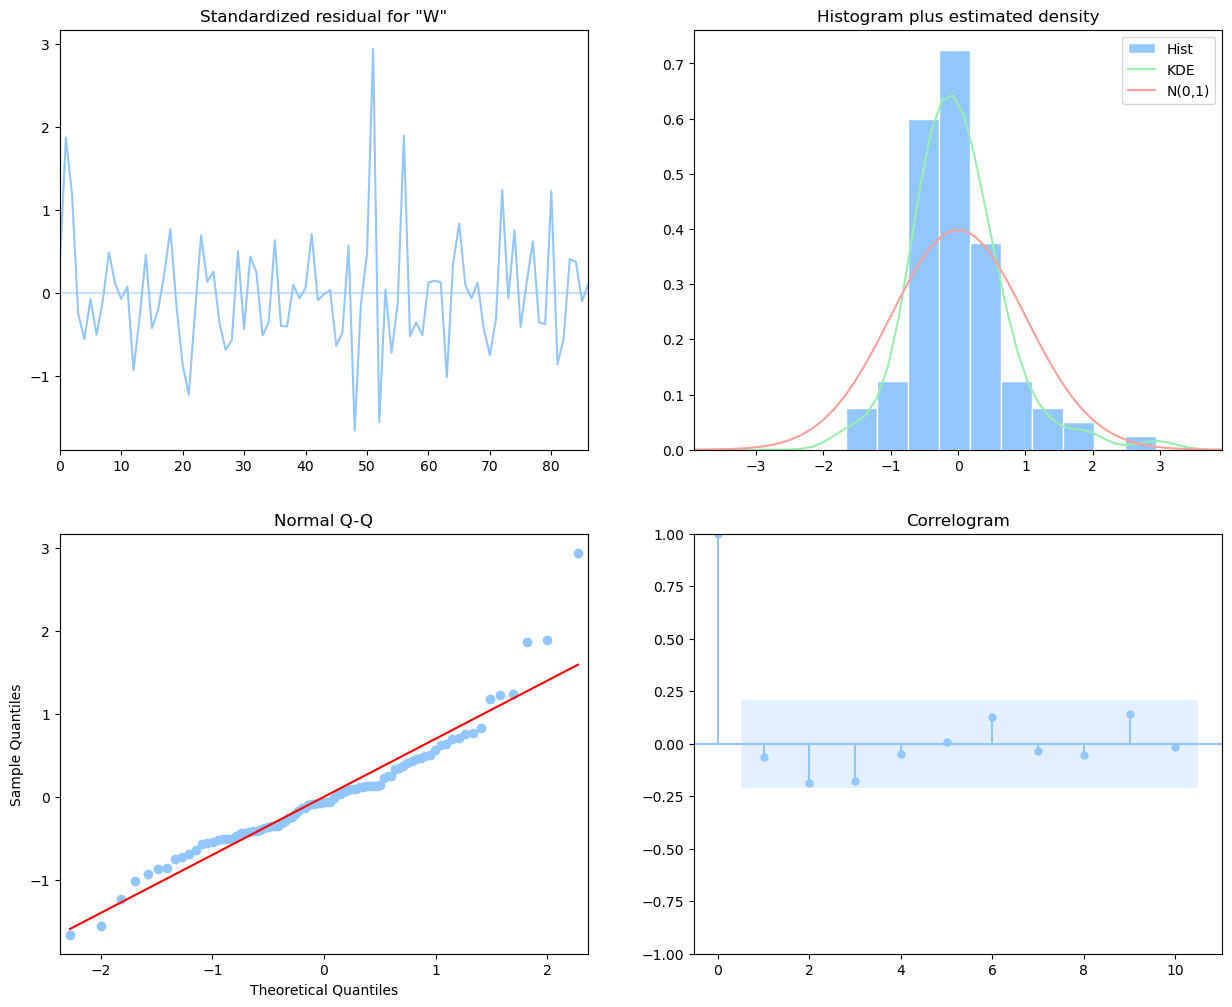

In [46]:
plt.style.use('seaborn-pastel')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [47]:
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

C:\Users\bindu\AppData\Local\Temp\ipykernel_21588\2689329424.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = y1['2010':].plot(label='observed')


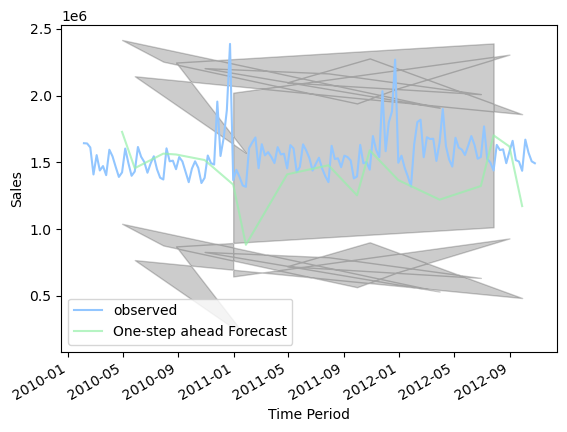

In [48]:
ax = y1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [49]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-7-27':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 46941407690.53


In [50]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

C:\Users\bindu\AppData\Local\Temp\ipykernel_21588\934700690.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = y1['2010':].plot(label='observed', figsize=(12, 8))


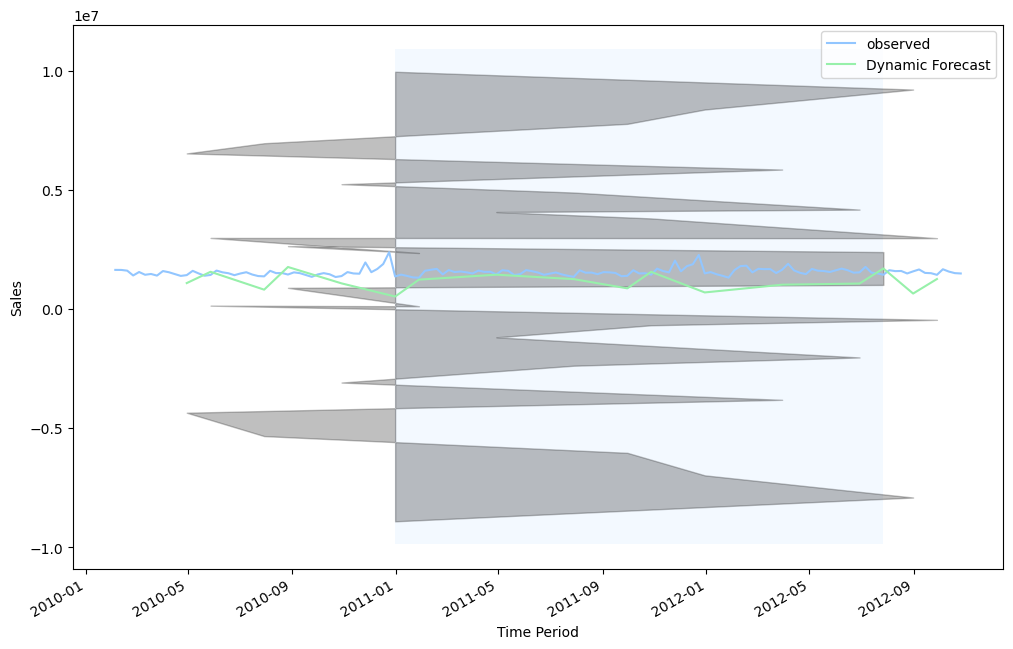

In [51]:
ax = y1['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

In [52]:
y_forecasted = pred_dynamic.predicted_mean
print(y_forecasted)

Date
2012-07-27    1.702736e+06
2010-08-27    1.765658e+06
2011-01-28    1.234851e+06
2010-05-28    1.563958e+06
2012-09-28    1.261079e+06
2011-10-28    1.562090e+06
2011-04-29    1.442416e+06
2012-06-29    1.071354e+06
2011-07-29    1.256616e+06
2010-10-29    1.078440e+06
2012-03-30    1.023077e+06
2010-04-30    1.090845e+06
2010-07-30    8.147513e+05
2011-09-30    8.699118e+05
2011-12-30    6.978651e+05
2012-08-31    6.516698e+05
2010-12-31    5.262570e+05
Name: predicted_mean, dtype: float64


In [53]:
y_truth = y1['2012-7-27':]

print(y_truth)

Date
2012-08-03    1631135.79
2012-10-05    1670785.97
2012-09-07    1661767.33
2012-08-10    1592409.97
2012-10-12    1573072.81
2012-09-14    1517428.87
2012-08-17    1597868.05
2012-10-19    1508068.77
2012-09-21    1506126.06
2012-08-24    1494122.38
2012-10-26    1493659.74
2012-07-27    1439123.71
2012-09-28    1437059.26
2012-08-31    1582083.40
Name: Weekly_Sales, dtype: float64


In [54]:
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 567488.67


In [55]:
Residual= y_forecasted - y_truth
print("Residual for Store1",np.abs(Residual).sum())

Residual for Store1 1370006.7241262337


In [56]:
pred_uc = results.get_forecast(steps=12)

print(pred_uc)

C:\Users\bindu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [57]:
forecasted_values = pred_uc.predicted_mean

confidence_intervals = pred_uc.conf_int()

print("Forecasted Values:")
print(forecasted_values)

print("\nConfidence Intervals:")
print(confidence_intervals)

Forecasted Values:
143    1.546457e+06
144    1.502338e+06
145    1.692810e+06
146    1.737869e+06
147    1.502889e+06
148    1.653788e+06
149    1.716162e+06
150    1.817866e+06
151    1.895100e+06
152    1.842933e+06
153    1.864885e+06
154    1.829045e+06
Name: predicted_mean, dtype: float64

Confidence Intervals:
     lower Weekly_Sales  upper Weekly_Sales
143        8.578787e+05        2.235034e+06
144        6.282502e+05        2.376427e+06
145        5.771647e+05        2.808456e+06
146        3.197065e+05        3.156032e+06
147       -2.067761e+05        3.212555e+06
148       -5.831077e+05        3.890683e+06
149       -9.055975e+05        4.337921e+06
150       -1.275697e+06        4.911429e+06
151       -1.728114e+06        5.518313e+06
152       -2.305892e+06        5.991759e+06
153       -2.950654e+06        6.680425e+06
154       -3.593141e+06        7.251231e+06


In [58]:
pred_ci = pred_uc.conf_int()

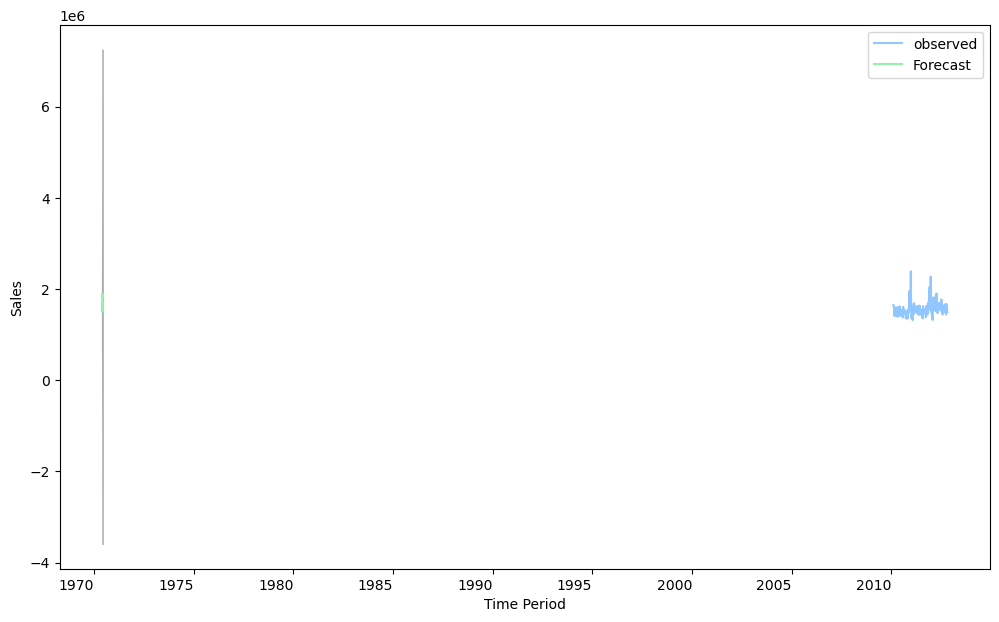

In [59]:
ax = y1.plot(label='observed', figsize=(12, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()